In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [212]:
data = pd.read_csv("neo.csv")

# Data analysis

In [213]:
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [214]:
data.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [216]:
data.isna().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [217]:
for i in ["orbiting_body","sentry_object","hazardous"]:
    print(i)
    print(data[i].value_counts())

orbiting_body
Earth    90836
Name: orbiting_body, dtype: int64
sentry_object
False    90836
Name: sentry_object, dtype: int64
hazardous
False    81996
True      8840
Name: hazardous, dtype: int64


In [218]:
data.drop(columns=["id","name","orbiting_body","sentry_object"], inplace=True)

In [219]:
data.select_dtypes(include="number").columns

Index(['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude'],
      dtype='object')

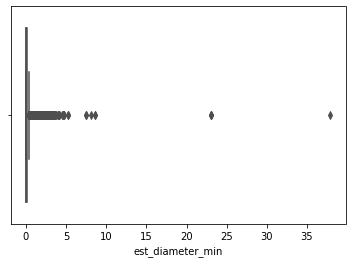

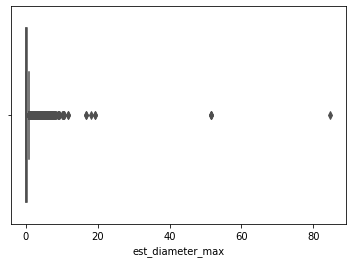

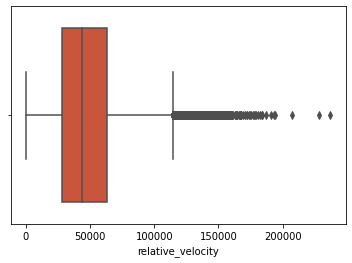

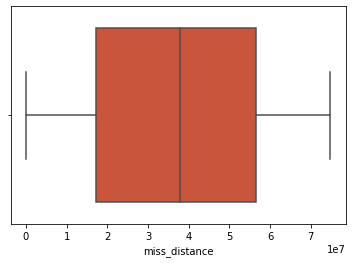

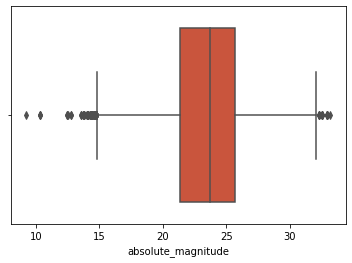

In [220]:
for i in ['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude']:
       plt.subplots()
       sns.boxplot(x=i, data=data, color="#E14625")
       plt.show()

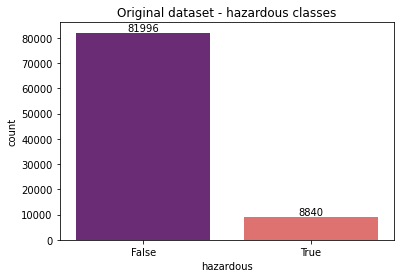

In [221]:
haz = sns.countplot(x="hazardous", data=data, palette="magma")
haz.bar_label(haz.containers[0])
plt.title("Original dataset - hazardous classes")
plt.show()

In [222]:
X = data.drop(columns="hazardous")
Y = data["hazardous"]

In [223]:
# Splitting the data into Training & Testing
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y)

In [224]:
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape) 
print(yTest.shape)

(68127, 5)
(22709, 5)
(68127,)
(22709,)


In [225]:
# Importing metrics
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score

In [226]:
results = pd.DataFrame(columns=["Model","TrainScore","TestScore","PrecisionTrue", "RecalTrue"])

In [227]:
import warnings
warnings.filterwarnings("ignore")

In [228]:
# Defining a function for metrics.
# Logistic Regression
# GaussianNB
# DecisionTreeClassifier
# RandomForestClassifier
# KNN
# SVC
# XGB
def classificationmodel(test):
    test.fit(xTrain, yTrain)
    scoretrain = test.score(xTrain, yTrain)
    scoretest = test.score(xTest, yTest)
    print("Score of the training dataset:", test.score(xTrain, yTrain))
    print("Score of the testing dataset:", test.score(xTest, yTest), "\n")
    print("Classification report on Testing split:")
    print(classification_report(yTest, test.predict(xTest)))
    plot_confusion_matrix(test, xTest, yTest)
    if len(results.index) == 0:
        results.loc[len(results.index)] = ["LR", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 1:
        results.loc[len(results.index)] = ["GNB", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 2:
        results.loc[len(results.index)] = ["DTC", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 3:
        results.loc[len(results.index)] = ["RFC", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 4:
        results.loc[len(results.index)] = ["KNN", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 5:
        results.loc[len(results.index)] = ["GBC", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 6:
        results.loc[len(results.index)] = ["XGB", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]

def crossval(m):
    print("Cross-validation on Training split (mean):")
    for i in ["accuracy","precision","recall"]:
        print(i.upper())
        print(cross_val_score(m, xTrain, yTrain, scoring=i).mean())
    print("\n")

# Trying the first two models

Cross-validation on Training split (mean):
ACCURACY
0.9025056156807615
PRECISION
0.0
RECALL
0.0


Score of the training dataset: 0.9025056145140693
Score of the testing dataset: 0.9032101809855123 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95     20511
        True       0.00      0.00      0.00      2198

    accuracy                           0.90     22709
   macro avg       0.45      0.50      0.47     22709
weighted avg       0.82      0.90      0.86     22709



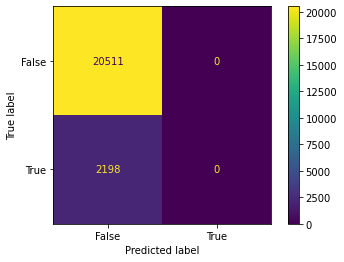

In [229]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
crossval(LR)
classificationmodel(LR)

Cross-validation on Training split (mean):
ACCURACY
0.8965755160466298
PRECISION
0.27669176401506246
RECALL
0.037488328029952764


Score of the training dataset: 0.8965021210386485
Score of the testing dataset: 0.8977497908318288 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.91      0.99      0.95     20511
        True       0.28      0.04      0.06      2198

    accuracy                           0.90     22709
   macro avg       0.59      0.51      0.51     22709
weighted avg       0.85      0.90      0.86     22709



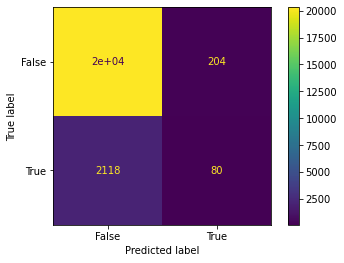

In [230]:
from sklearn.naive_bayes import GaussianNB
GSS = GaussianNB()
crossval(GSS)
classificationmodel(GSS)

# Feature engineering

In [231]:
def transformization(tran):
    global xTrain, yTrain
    if tran == "stand":
        print("You have selected Standardization.")
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        scaled = scaler.fit_transform(X)
        xTrain, xTest, yTrain, yTest = train_test_split(scaled,Y)
        xTrain = pd.DataFrame(xTrain, columns=X.columns)
        xTest = pd.DataFrame(xTest, columns=X.columns)

    elif tran == "norm":
        print("You have selected Normalization.")
        from sklearn.preprocessing import MinMaxScaler
        norm = MinMaxScaler()
        normed = norm.fit_transform(X)
        xTrain, xTest, yTrain, yTest = train_test_split(normed,Y)
        xTrain = pd.DataFrame(xTrain, columns=X.columns)
        xTest = pd.DataFrame(xTest, columns=X.columns)
        
    else:
        print("You didn't select any type of transformation of features, proceeding with the original dataset.")


def classdist(classd):
    global xTrain, yTrain
    if classd == "over":
        print("You have selected Oversampling.")
        from imblearn.over_sampling import RandomOverSampler
        ros = RandomOverSampler(sampling_strategy="minority")
        xTrain, yTrain = ros.fit_resample(xTrain, yTrain)
    elif classd == "smote":
        print("You have selected SMOTE.")
        from imblearn.over_sampling import SMOTE
        smote = SMOTE(random_state = 42)
        xTrain, yTrain = smote.fit_resample(xTrain, yTrain)
    elif classd == "under":
        print("You have selected Undersampling.")
        from imblearn.under_sampling import RandomUnderSampler
        ros = RandomUnderSampler(sampling_strategy="majority")
        xTrain, yTrain = ros.fit_resample(xTrain, yTrain)
    else:
        print("You didn't select any class sampling technique, proceeding with the original dataset.")



In [232]:
results = pd.DataFrame(columns=["Model","TrainScore","TestScore","PrecisionTrue","RecalTrue"])

In [233]:
# TRANSFORMATION OF FEATURES
# Standardization - "stand"
# Normalizazion - "norm"
# None - "none"
transformization("none")

You didn't select any type of transformation of features, proceeding with the original dataset.


In [234]:
# CLASS SAMPLING
# Oversampling - "over"
# SMOTE - "smote"
# Undersampling - "under"
# None - "none"
classdist("over")

You have selected Oversampling.


In [235]:
xTrain.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,0.231502,0.517654,77277.166567,4.540242e+07,20.30
1,0.048368,0.108153,42631.046268,6.906757e+07,23.70
2,0.614547,1.374168,76374.015516,4.166726e+07,18.18
3,0.175612,0.392681,62774.018634,2.806567e+07,20.90
4,1.243240,2.779969,48292.912950,3.058303e+07,16.65


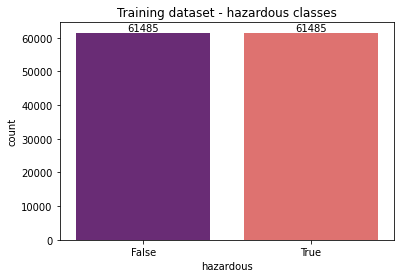

In [236]:
haz = sns.countplot(x=yTrain, palette="magma")
haz.bar_label(haz.containers[0])
plt.title("Training dataset - hazardous classes")
plt.show()

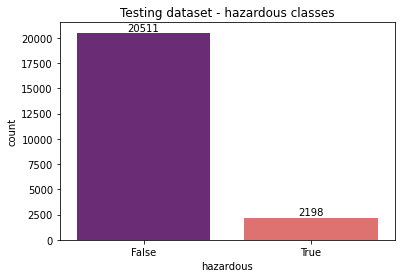

In [237]:
haz1 = sns.countplot(x=yTest, palette="magma")
haz1.bar_label(haz1.containers[0])
plt.title("Testing dataset - hazardous classes")
plt.show()

# ML models

Cross-validation on Training split (mean):
ACCURACY
0.5683174758071075
PRECISION
0.5490844445465914
RECALL
0.7641863869236399


Score of the training dataset: 0.5680897779946328
Score of the testing dataset: 0.4097054031441279 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.94      0.37      0.53     20511
        True       0.12      0.77      0.20      2198

    accuracy                           0.41     22709
   macro avg       0.53      0.57      0.37     22709
weighted avg       0.86      0.41      0.50     22709



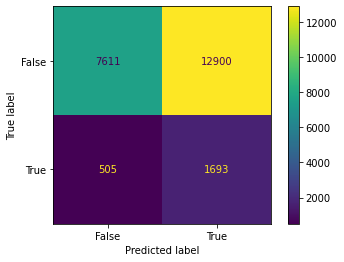

In [238]:
# Linear Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
from sklearn.model_selection import cross_val_score
crossval(LR)
classificationmodel(LR)

Cross-validation on Training split (mean):
ACCURACY
0.6069041229568188
PRECISION
0.631693049848167
RECALL
0.5128242660811579


Score of the training dataset: 0.6067089534032691
Score of the testing dataset: 0.6821084151657933 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.93      0.70      0.80     20511
        True       0.16      0.53      0.24      2198

    accuracy                           0.68     22709
   macro avg       0.55      0.61      0.52     22709
weighted avg       0.86      0.68      0.75     22709



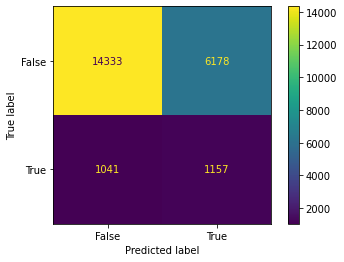

In [239]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GSS = GaussianNB()
crossval(GSS)
classificationmodel(GSS)

Cross-validation on Training split (mean):
ACCURACY
0.9674554769455964
PRECISION
0.9389092695963772
RECALL
0.9999512076116126


Score of the training dataset: 1.0
Score of the testing dataset: 0.8944911709014047 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.94      0.94      0.94     20511
        True       0.45      0.44      0.45      2198

    accuracy                           0.89     22709
   macro avg       0.70      0.69      0.69     22709
weighted avg       0.89      0.89      0.89     22709



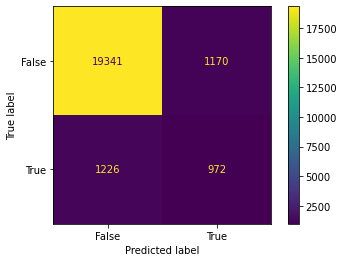

In [240]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier()
crossval(DTR)
classificationmodel(DTR)

Score of the training dataset: 1.0
Score of the testing dataset: 0.910564093531199 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.95      0.95      0.95     20511
        True       0.54      0.53      0.53      2198

    accuracy                           0.91     22709
   macro avg       0.74      0.74      0.74     22709
weighted avg       0.91      0.91      0.91     22709



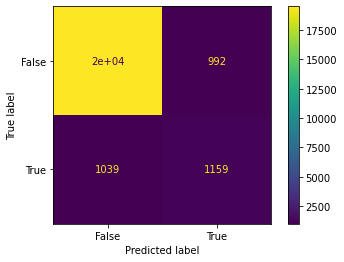

In [241]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
# crossval(RFC)
classificationmodel(RFC)

Score of the training dataset: 0.9170610718061316
Score of the testing dataset: 0.7253511823506099 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.92      0.76      0.83     20511
        True       0.14      0.37      0.21      2198

    accuracy                           0.73     22709
   macro avg       0.53      0.57      0.52     22709
weighted avg       0.84      0.73      0.77     22709



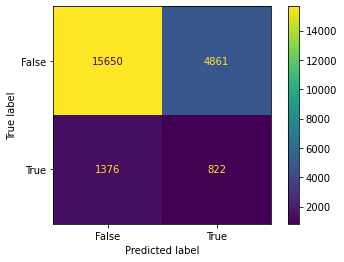

In [242]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
KNNC = KNeighborsClassifier()
# crossval(KNNC)
classificationmodel(KNNC)

Score of the training dataset: 0.8788241034398634
Score of the testing dataset: 0.7914483244528601 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       1.00      0.77      0.87     20511
        True       0.31      0.98      0.48      2198

    accuracy                           0.79     22709
   macro avg       0.66      0.88      0.67     22709
weighted avg       0.93      0.79      0.83     22709



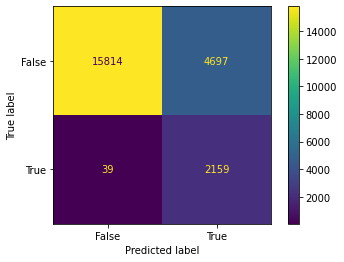

In [243]:
# Gradien Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
#crossval(GBC)
classificationmodel(GBC)

Score of the training dataset: 0.9068959908920875
Score of the testing dataset: 0.8219648597472368 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.99      0.81      0.89     20511
        True       0.35      0.94      0.51      2198

    accuracy                           0.82     22709
   macro avg       0.67      0.88      0.70     22709
weighted avg       0.93      0.82      0.85     22709



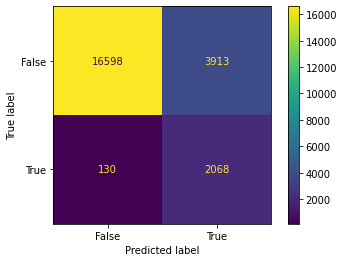

In [244]:
# XGBoost Classifier
from xgboost import XGBClassifier
XGB = XGBClassifier(eval_metric='mlogloss')
# #crossval(XGB)
classificationmodel(XGB)

In [245]:
results

,Model,TrainScore,TestScore,PrecisionTrue,RecalTrue
0,LR,0.568090,0.409705,0.116015,0.770246
1,GNB,0.606709,0.682108,0.157737,0.526388
2,DTC,1.000000,0.894491,0.453782,0.442220
3,RFC,1.000000,0.910564,0.538819,0.527298
4,KNN,0.917061,0.725351,0.144642,0.373976
5,GBC,0.878824,0.791448,0.314907,0.982257
6,XGB,0.906896,0.821965,0.345762,0.940855


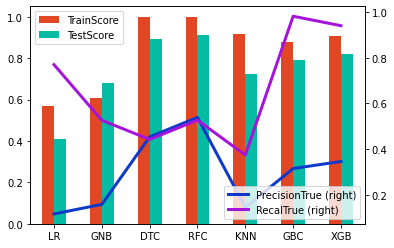

In [246]:
results[["TrainScore","TestScore"]].plot(kind="bar", color=["#E14625","#06BBA3"])
plt.xticks(range(0,len(results["Model"])), results["Model"])
results["PrecisionTrue"].plot(c="#0E38CA", linewidth=3, secondary_y=True, label="PrecisionTrue")
results["RecalTrue"].plot(c="#A514DB", linewidth=3, secondary_y=True, label="RecalTrue")
plt.legend(loc="lower right")
plt.show()

In [247]:
# Changing max_depth to avoid overfitting.
DTC2 = DecisionTreeClassifier(max_depth=32)
DTC2.fit(xTrain, yTrain)
print("Score of training dataset:",DTC2.score(xTrain, yTrain))
print("Score of testing dataset:",DTC2.score(xTest, yTest))
print(classification_report(yTest, DTC2.predict(xTest)))
results.loc[len(results.index)] = ["DTC2", DTC2.score(xTrain, yTrain), DTC2.score(xTest, yTest), precision_score(y_true=yTest, y_pred=DTC2.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=DTC2.predict(xTest), pos_label=True)]

Score of training dataset: 0.9778319915426527
Score of testing dataset: 0.8744550618697433
              precision    recall  f1-score   support

       False       0.95      0.91      0.93     20511
        True       0.39      0.53      0.45      2198

    accuracy                           0.87     22709
   macro avg       0.67      0.72      0.69     22709
weighted avg       0.89      0.87      0.88     22709



In [248]:
# Changing max_depth to avoid overfitting.
RFC2 = RandomForestClassifier(max_depth=32)
RFC2.fit(xTrain, yTrain)
print("Score of training dataset:",RFC2.score(xTrain, yTrain))
print("Score of testing dataset:",RFC2.score(xTest, yTest))
print(classification_report(yTest, RFC2.predict(xTest)))
results.loc[len(results.index)] = ["RFC2", RFC2.score(xTrain, yTrain), RFC2.score(xTest, yTest), precision_score(y_true=yTest, y_pred=RFC2.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=RFC2.predict(xTest), pos_label=True)]

Score of training dataset: 0.9941123851345857
Score of testing dataset: 0.9014928002113699
              precision    recall  f1-score   support

       False       0.96      0.93      0.94     20511
        True       0.49      0.60      0.54      2198

    accuracy                           0.90     22709
   macro avg       0.72      0.77      0.74     22709
weighted avg       0.91      0.90      0.91     22709



Score of the training dataset: 0.9377165162234692
Score of the testing dataset: 0.8441146681932273 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.98      0.84      0.91     20511
        True       0.37      0.84      0.51      2198

    accuracy                           0.84     22709
   macro avg       0.67      0.84      0.71     22709
weighted avg       0.92      0.84      0.87     22709



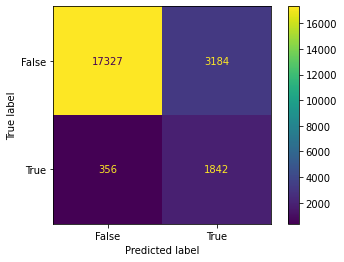

In [249]:
RFC3 = RandomForestClassifier(max_depth=32, class_weight={False:0.1,True:0.9})
classificationmodel(RFC3)

Score of the training dataset: 0.9962511181589006
Score of the testing dataset: 0.9114888370249681 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.95      0.95      0.95     20511
        True       0.54      0.52      0.53      2198

    accuracy                           0.91     22709
   macro avg       0.75      0.74      0.74     22709
weighted avg       0.91      0.91      0.91     22709



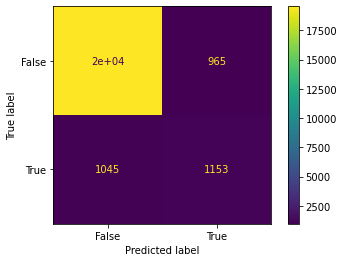

In [250]:
RFC4 = RandomForestClassifier(max_depth=32, class_weight={False:0.9,True:0.1})
classificationmodel(RFC4)

Score of the training dataset: 0.993225990078881
Score of the testing dataset: 0.9002598088863446 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.96      0.93      0.94     20511
        True       0.49      0.61      0.54      2198

    accuracy                           0.90     22709
   macro avg       0.72      0.77      0.74     22709
weighted avg       0.91      0.90      0.91     22709



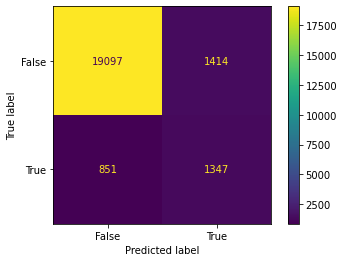

In [251]:
RFC5 = RandomForestClassifier(max_depth=32, class_weight="balanced_subsample")
classificationmodel(RFC5)

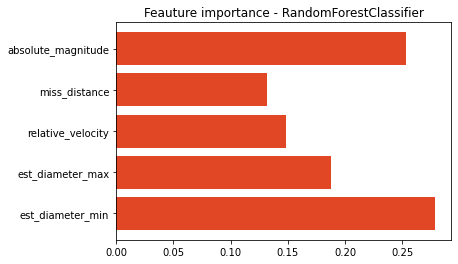

In [260]:
plt.barh(RFC5.feature_names_in_, RFC5.feature_importances_, color="#E14625")
plt.title("Feauture importance - RandomForestClassifier")
plt.show()

In [253]:
impo = pd.Series(RFC5.feature_importances_, index=xTrain.columns)
impo

est_diameter_min      0.278632
est_diameter_max      0.188130
relative_velocity     0.148339
miss_distance         0.131607
absolute_magnitude    0.253292
dtype: float64

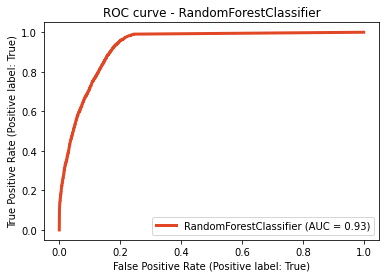

In [263]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(RFC5, xTest, yTest, color="#E14625", linewidth=3) 
plt.title("ROC curve - RandomForestClassifier")
plt.show()

# Results

In [255]:
results

,Model,TrainScore,TestScore,PrecisionTrue,RecalTrue
0,LR,0.568090,0.409705,0.116015,0.770246
1,GNB,0.606709,0.682108,0.157737,0.526388
2,DTC,1.000000,0.894491,0.453782,0.442220
3,RFC,1.000000,0.910564,0.538819,0.527298
4,KNN,0.917061,0.725351,0.144642,0.373976
5,GBC,0.878824,0.791448,0.314907,0.982257
6,XGB,0.906896,0.821965,0.345762,0.940855
7,DTC2,0.977832,0.874455,0.390620,0.530482
8,RFC2,0.994112,0.901493,0.492737,0.601911


In [267]:
results[(results["TrainScore"] > 0.9) & (results["TestScore"] > 0.88) & (results["PrecisionTrue"] > 0.7) & (results["RecalTrue"] > 0.7)]

,Model,TrainScore,TestScore,PrecisionTrue,RecalTrue
